In [ ]:
import os
import random

import albumentations as A
import matplotlib.pyplot as plt
import numpy as np
from albumentations.pytorch import ToTensorV2
from PIL import Image
from tqdm import tqdm

from dojo.utils import save_transform

In [ ]:
transform = A.Compose(
    [A.LongestMaxSize(max_size=256), A.RandomResizedCrop(height=224, width=224, scale=(0.8, 1.0)), A.ToFloat()]
)
transform

In [ ]:
train_dir = ""
class_to_fpaths = dict()

for classname in os.listdir(train_dir):
    class_dir = os.path.join(train_dir, classname)

    for root, _, fnames in os.walk(class_dir):
        fpaths = [os.path.join(root, fname) for fname in fnames]
        class_to_fpaths[classname] = fpaths

print(class_to_fpaths.keys())

Class: interior


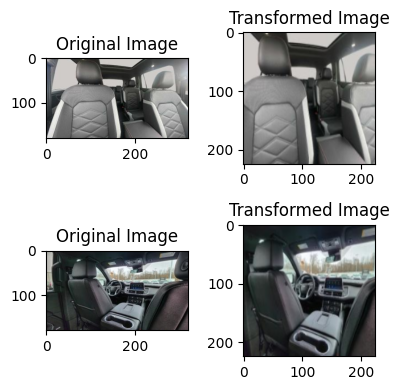

Class: key


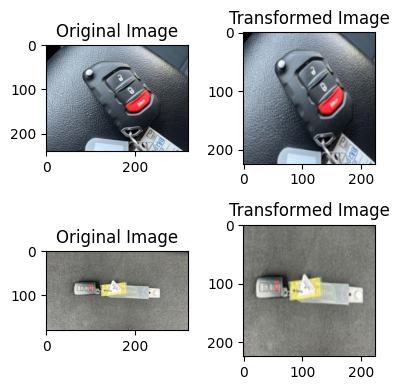

Class: bottom


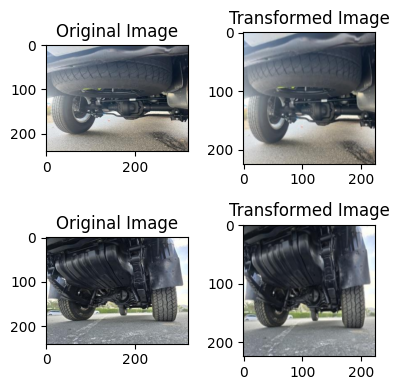

Class: reg


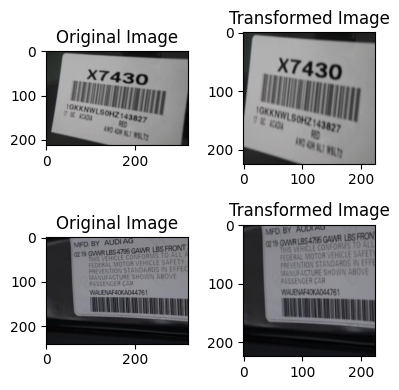

Class: open-door


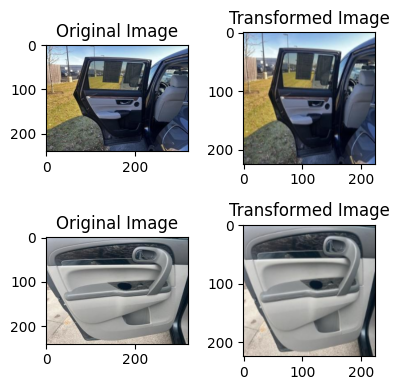

Class: Interior_Focus_Shoot


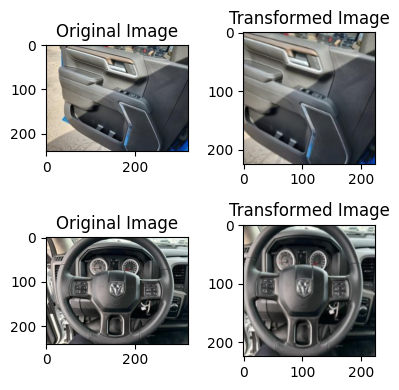

Class: trunk


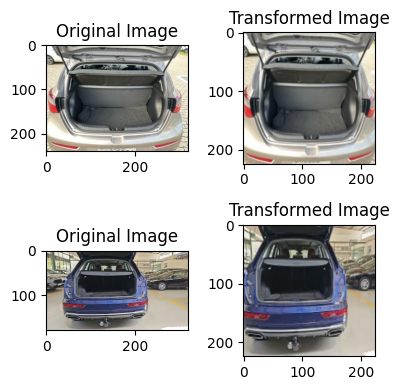

Class: engine


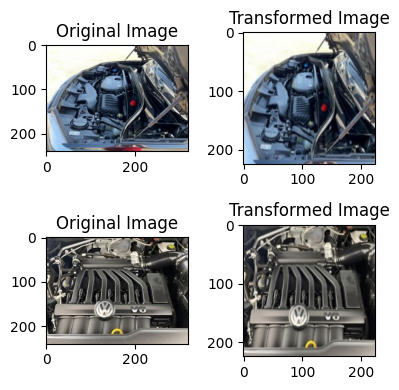

In [6]:
for classname, fpaths in class_to_fpaths.items():
    random_fpaths = random.sample(fpaths, 2)
    print(f"Class: {classname}")

    fig, axs = plt.subplots(len(random_fpaths), 2, figsize=(4, len(random_fpaths) * 2))

    for i, fpath in enumerate(random_fpaths):
        image = np.array(Image.open(fpath))
        axs[i, 0].imshow(image)
        axs[i, 0].set_title("Original Image")

        transformed_image = transform(image=image)["image"]
        axs[i, 1].imshow(transformed_image)
        axs[i, 1].set_title("Transformed Image")

        # imshow(transformed_image)
    plt.tight_layout()
    plt.show()

In [7]:
final_transform = A.Compose(
    [
        transform,
        ToTensorV2(),
    ]
)

In [5]:
save_transform(
    final_transform,
    "",
)